![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S3_clase_clustering_I/main/figs/taller-meca-aprendizaje%20no%20supervisado_banner%201169%20x%20200%20px%20-05.png)

# Sesión Sincrónica Semana 3


En la segunda semana  nos enfocamos en la descomposición en valores singulares, otra forma de análisis matricial que conduce a representaciones de baja dimensión de matrices altamente dimensionales.

En la tercer semana nos enfocaremos en el análisis de clusters, haciendo hicapié en K-medias y K-meoides.


**NO** es necesario editar el archivo o hacer una entrega. Los ejemplos contienen celdas con código ejecutable (`en gris`), que podrá modificar libremente. Esta puede ser una buena forma de aprender nuevas funcionalidades del *cuaderno*, o experimentar variaciones en los códigos de ejemplo.



# Introducción SVD

- Los datos suelen venir con información, redundancia y ruido.


- Nuestro objetivo siempre es extraer la máxima información posible de los datos mientras reducimos el ruido e ignoramos la información redundante.

- La descomposición en valores singulares (SVD),  permite una representación exacta de cualquier matriz, facilitando también la eliminación de las partes menos importantes de esa representación.


## Usos de la SVD

- Reducción de Dimensiones: Puede usarse para reducir la dimensionalidad de los datos, manteniendo la información más importante.
- Filtrado de Ruido: Ayuda a eliminar el ruido en los datos al conservar sólo los componentes principales.
- Recomendación: En sistemas de recomendación, SVD puede usarse para predecir los elementos que un usuario podría preferir.



## Singular Value Decomposition
- Supongamos que $ X $ es una matriz $ n \times k $  con rango $ r $. Donde necesariamente, $ r \leq \min(n,k) $. (Recordemos que el [rango de una matriz](https://es.wikipedia.org/wiki/Rango_(%C3%A1lgebra_lineal)) es el número máximo de columnas (filas respectivamente) que son linealmente independientes.)


- Podemos pensar esta matriz $X$ como los datos
    - Cada fila es una observación
    - Cada columna es una variable aleatoria que describe un atributo.

La **descomposición en valores singulares** de la matriz $X$, es


$$
X  = U \Sigma V'
$$


## Principal Component Regression


### OLS


\begin{align}
y = X \beta + u
\end{align}

\begin{align}
\hat{\beta}= (X'X)^{-1}X'y
\end{align}

Problemas
- Multicolinealidad
- Mas predictores (features) que observaciones
- Entre otros

## PC Regression

El enfoque de la regresión por componentes principales (PCR, por sus siglas en inglés) implica:

1. construir las primeras $m$ componentes principales
2. luego utilizar estas componentes como predictores en un modelo de regresión lineal que se ajusta utilizando mínimos cuadrados.


Las ideas claves son:
- PC son independientes por construcción mitigando asi los problemas de colinealidad.
- Reducimos dimensión: A menudo, un pequeño número de componentes principales es suficiente para explicar la mayor parte de la variabilidad en los datos, así como la relación con la respuesta.



Mis disculpas por la confusión anterior. Aquí tienes el texto con las ecuaciones en formato inline para que funcionen en Jupyter Notebook:

### Paso 1: Set up

Supongamos que tienes un conjunto de datos con $ n $ observaciones y $ k $ predictores (características). El conjunto de datos se puede representar como:

$$
\mathbf{X} = \begin{pmatrix}
x_{11} & x_{12} & \dots & x_{1k} \\
x_{21} & x_{22} & \dots & x_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \dots & x_{nk}
\end{pmatrix}, \quad \mathbf{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}
$$

Aquí, $\mathbf{X}$ es la matriz $n \times k$ de predictores, y $\mathbf{y}$ es el vector $n \times 1$ de la variable de respuesta.

Queremos modelar la relación entre $\mathbf{X}$ y $\mathbf{y}$ utilizando Regresión por Componentes Principales (PCR, por sus siglas en inglés). Para hacer esto, primero necesitamos dividir el conjunto de datos en conjuntos de entrenamiento y prueba.

#### 1.1 Dividir el Conjunto de Datos

Dividimos los datos en un conjunto de entrenamiento (utilizado para construir el modelo) y un conjunto de prueba (utilizado para evaluar el modelo).

Denotemos:

- $\mathbf{X}_{\text{train}}$ y $\mathbf{y}_{\text{train}}$ como los datos de entrenamiento,
- $\mathbf{X}_{\text{test}}$ y $\mathbf{y}_{\text{test}}$ como los datos de prueba.



### Paso 2: Análisis de Componentes Principales (PCA) en los Datos de Entrenamiento con SVD


Estandarizamos los datos y utilizamos la Descomposición en Valores Singulares (SVD) en la matriz de datos centrados y escalados $\mathbf{X}_{\text{train, centered}}$:

$$
\mathbf{X}_{\text{train, centered}} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T
$$

- $\mathbf{U}$ es la matriz de vectores singulares izquierdos.
- $\mathbf{\Sigma}$ es la matriz diagonal de valores singulares, que representan las raíces cuadradas de los valores propios de $\mathbf{X}_{\text{train, centered}}^T \mathbf{X}_{\text{train, centered}}$.
- $\mathbf{V}$ es la matriz de vectores singulares derechos, cuyas columnas son los componentes principales.

Las columnas de $\mathbf{V}$ son los componentes principales, y los valores en $\mathbf{\Sigma}$ nos indican cuánta varianza explica cada componente principal.

##### SVD and PCA

Si

\begin{align}
X = U \Sigma V'
\end{align}



\begin{align}
V =eigenvectores(X'X)
\end{align}

Los scores por lo tanto son

\begin{align}
X V = U \Sigma V' V
\end{align}

(recordemos las propiedades $V'V  = I$ )

\begin{align}
X V = U \Sigma
\end{align}


### Paso 3: Ajustar el Modelo de Regresión Usando los Componentes Principales Seleccionados

Ahora que hemos seleccionado $m$ componentes principales (denotemos esta matriz reducida como $\mathbf{Z}_{\text{train, m}}$), podemos ajustar un modelo de regresión lineal utilizando estos componentes como predictores:

$$
\mathbf{y}_{\text{train}} = \mathbf{Z}_{\text{train, m}} \mathbf{\beta} + \epsilon
$$

Donde:

- $\mathbf{y}_{\text{train}}$ es el vector de la variable de respuesta del conjunto de datos de entrenamiento.
- $\mathbf{Z}_{\text{train, m}}$ es la matriz de los primeros $m$ puntajes de componentes principales.
- $\mathbf{\beta}$ es el vector de coeficientes de regresión a estimar.
- $\epsilon$ es el término de error.


### Paso 4: Transformar los Datos de Prueba

Después de ajustar el modelo en los datos de entrenamiento, necesitamos estandarizar los datos de prueba y proyectar los Datos de Prueba en los Componentes Principales

$$
\mathbf{Z}_{\text{test, m}} = \mathbf{X}_{\text{test, estandarizados}} \mathbf{V}_m = U \Sigma_m
$$

Aquí, $\mathbf{Z}_{\text{test, m}}$ son los datos de prueba en el espacio reducido de componentes principales, con solo los primeros $m$ componentes.

### Paso 5: Predecir y Evaluar

Utilizamos el modelo de regresión ajustado para hacer predicciones en los datos de prueba:

$$
\hat{\mathbf{y}}_{\text{test}} = \mathbf{Z}_{\text{test, m}} \mathbf{\beta}
$$

Aquí, $\hat{\mathbf{y}}_{\text{test}}$ representa los valores predichos de la variable de respuesta para los datos de prueba.

Luego, podemos evaluar el desempeño del modelo utilizando en este caso el Error Cuadrático Medio (MSE):

$$
\text{MSE} = \frac{1}{n_{\text{test}}} \sum_{i=1}^{n_{\text{test}}} (\hat{y}_{\text{test}, i} - y_{\text{test}, i})^2
$$



## Ejemplo Hitters PCR

In [47]:
!pip uninstall -y numpy scikit-learn-extra scikit-learn
!pip install numpy==1.23.5 scikit-learn==1.3.0 scikit-learn-extra
!pip install pca

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.


In [1]:
import numpy as np
import pandas as pd

Hitters = pd.read_csv('https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S3_clase_clustering_I/main/data/Hitters.csv')

Hitters = Hitters.dropna () #drop faltantes

In [2]:
Hitters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

In [3]:
y = Hitters.Salary

# Drop independent variable (Salary), y los factores
X = Hitters.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')


In [4]:
X.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000


In [5]:
X.shape

(263, 16)

### Train and test

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10101)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((210, 16), (53, 16), (210,), (53,))

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [8]:
U_train, S_train, Vt_train = np.linalg.svd(X_train, full_matrices=True)
U_test, S_test, V_test = np.linalg.svd(X_test, full_matrices=True)

In [9]:
U_train.shape, S_train.shape, Vt_train.shape

((210, 210), (16,), (16, 16))

In [10]:
n_train,k_train =X_train.shape #dimensiones n nro obs, y k el nro variables


S2_train= np.resize(S_train,[n_train,1])*np.eye(n_train,k_train) #ponemos los valores singulares en una matriz diagonal

l=5
PC_train=np.dot(U_train[:,0:l],S2_train[0:l,0:l])

pd.DataFrame(PC_train)

,0,1,2,3,4
0,-1.466349,-1.558582,-1.324688,-0.436505,-0.217628
1,-0.968782,1.559115,0.887725,0.004321,0.144851
2,-8.064768,7.586140,2.023926,1.722112,0.746284
3,0.066345,-4.393781,-0.820444,2.769076,-0.689551
4,-0.186751,-3.152686,2.561932,-0.253231,-1.475610
...,...,...,...,...,...
205,-6.197331,3.810142,1.579699,-0.397330,-1.464983
206,-2.018374,2.115433,2.269539,-0.291406,-1.024027
207,2.199445,1.158291,-0.773876,-0.161654,-0.162616
208,0.397917,-2.625687,-1.537166,-0.492032,1.354391


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

scores = pca.fit_transform(X_train)
pd.DataFrame(scores)

,0,1,2,3,4
0,1.466349,-1.558582,-1.324688,-0.436505,-0.217628
1,0.968782,1.559115,0.887725,0.004321,0.144851
2,8.064768,7.586140,2.023926,1.722112,0.746284
3,-0.066345,-4.393781,-0.820444,2.769076,-0.689551
4,0.186751,-3.152686,2.561932,-0.253231,-1.475610
...,...,...,...,...,...
205,6.197331,3.810142,1.579699,-0.397330,-1.464983
206,2.018374,2.115433,2.269539,-0.291406,-1.024027
207,-2.199445,1.158291,-0.773876,-0.161654,-0.162616
208,-0.397917,-2.625687,-1.537166,-0.492032,1.354391


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(PC_train, y_train)

LinearRegression()

In [13]:
n_test,k_test =X_test.shape


l=5
PC_test=np.dot(X_test,V_test[:,0:l])


In [14]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(PC_test)
mse = mean_squared_error(y_test, y_pred)
mse

194345.6092255002

## Con Pipes (opcional)

In [15]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold

In [16]:
# Definir los componentes del pipeline
scaler = StandardScaler()
pca = PCA()
linreg = LinearRegression()

# Crear el pipeline (corrigiendo los nombres de los pasos)
pipe = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('linreg', linreg)
])

# Ajustar el modelo con los datos de entrenamiento
pipe.fit(X_train, y_train)

# Acceder a los coeficientes del modelo de regresión lineal
print(pipe.named_steps['linreg'].coef_)

[ 106.99982323  -18.46207454  -22.22894916   67.09301892   32.38467022
    3.46326522   36.18072806   72.966368      9.6970579   112.86209805
 -332.14976415  -12.38681304  410.70956266 -208.37645757  870.01227944
 -192.77219354]


In [17]:
# Definir la malla de hiperparámetros (corrigiendo el nombre del parámetro)
param_grid = {'pca__n_components': range(1, min(X_train.shape[0], X_train.shape[1]) + 1)}

# Configurar validación cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Configurar GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=kfold, scoring='neg_mean_squared_error')

# Ajustar el modelo con GridSearchCV
grid.fit(X_train, y_train)

# Mostrar el mejor número de componentes PCA encontrado
print(f"Mejor número de componentes PCA: {grid.best_params_['pca__n_components']}")

Mejor número de componentes PCA: 4


# Introducción al análisis de clusters

Tanto Clustering como PCA y SVD buscan simplificar los datos de forma no supervizada, pero sus mecanismos son diferentes:

- PCA y SVD buscan encontrar una representación de baja dimensión de las observaciones que explique una buena fracción de la varianza;

- Clustering busca encontrar subgrupos homogéneos entre las observaciones.


## ¿Qué es el análisis de clusters?

El análisis de clusters es una de las principales aplicaciones de los algoritmos de aprendizaje no supervisado. Este tipo de análisis se utiliza para juntar observaciones similares en grupos, por ejemplo:

- Segmentar a clientes por preferencias o sensibilidad a cambios en los precios.
- Encontrar usuarios de una aplicación de música por géneros o bandas que prefieren.
- Agrupar a votantes de acuerdo con los temas que les importa al momento de votar.
- Dividir un corpus de documentos en temas.

El gráfico siguiente ilustra el resultado de un análisis de clusters basado en dos variables:

![Clase aprendizaje no supervisado](https://raw.githubusercontent.com//MECA4605-Aprendizaje-no-supervisado/S3_clase_clustering_I/main/figs/plot_clustering_notebook.png)


Se puede apreciar que las observaciones se pueden separar claramente en 3 grupos o clusters, donde las observaciones son lo mas similares dentro de los clusters y  disimilares entre ellos.

Las etapas del análisis de clusters podemos resumirlas de la siguiente forma:

1. Iniciamos con una matriz de datos

    \begin{align}
X_{n\times k}=\left(\begin{array}{cccc}
x_{11} &  & \dots & x_{1k}\\
\\
\vdots &  & x_{ik} & \vdots\\
\\
x_{n1} &  & \dots & x_{nk}
\end{array}\right)
    \end{align}

2. Calculamos la matriz de distancia o disimilitud

\begin{align}
D_{n\times n}=\left(\begin{array}{ccccc}
d_{11} &  & \dots &  & d_{1n}\\
 & \ddots\\
\vdots &  & d_{jj} &  & \vdots\\
 &  &  & \ddots\\
d_{n1} &  & \dots &  & d_{nn}
\end{array}\right)
\end{align}


3. Aplicamos el algoritmo de clustering. Existen varios tipos, en esta semana nos centramos en aquellos  **Algoritmos basados en centroides**: cada cluster está representado por un centroide. Los clusters se construyen en función de la distancia al centroide del grupo.

## Clustering

### K-medias

- El algorito de K-medias, forma parte de los algoritmos de clustering basados en centroides y es uno de los más intutivos y utilizados.
   
- El algoritmo  agrupa las observaciones en un número predefinido de K clusters de forma que, la suma de las varianzas internas de los clusters, sea lo menor posible.
   
- En otra palabras, busca que las observaciones dentro del cluster sean los más similares entre si, y fuera de los clusters lo más disimilares entre ellas.


### K-Medoides  

-  K-medoides es un método de clustering muy similar a K-medias puesto que ambos agrupan las observaciones en K clusters.

-  Sin embargo, la diferencia principal radica en que K-medoides en vez de utilizar centroides, emplea medoides.

- Un medoide es un elemento del cluster cuya distancia promedio entre él y todos los demás elementos del cluster es la menor posible.

- Este elemento es el elemento más central del cluster. La idea es que al ser el más central puede ser considerado como el más representativo.

- Inicialmente este algoritmo se implementó usando como medida de distancia  la distancia de Manhattan, sin embargo el algoritmo puede ser generalizado para utilizar cualquier medida de distancia.

-  El hecho de utilizar medoides en lugar de centroides hace de K-medoides un método más robusto que K-medias, ya que es menos sensible a *outliers* o valores atípicos. La siguiente figura ilustra la diferencia y muestra como la presencia de un *outlier* posiciona al centroide, denotado con $x$, fuera de la región más densa:

![Clase aprendizaje no supervisado](https://raw.githubusercontent.com//MECA4605-Aprendizaje-no-supervisado/S3_clase_clustering_I/main/figs/media_vs_medoide.png)


### Evaluación de los clusters


Este es un procedimiento algo arbitrario; uno de los aspectos más débiles de realizar un análisis de clusters.  Existen diferentes métodos (reglas de detención) para hacer esto, generalmente involucrando alguna medida de dis/similitud (distancia) entre grupos. Dos de las más usadas son:

#### Método del codo

El  método de codo, o Elbow (en inglés), consiste en graficar la varianza intra cluster en función del número de clusters y encontrar el punto de la curva, codo, a partir del cual la mejora deja de ser notable.

La desventaja de este método para seleccionar $K$ es que no existen criterios claros para saber hasta que punto una disminución marginal es razonable o no, y esto lleva a diferencias entre investigadores.

#### Coeficiente de Silhouette

Otro criterio, es el coeficiente de Silhouette pues este nos indica la calidad de los clusters en donde números más grandes corresponden con mejores divisiones.

Cuantifica cuán buena es la asignación que se ha hecho de una observación comparando su similitud con el resto de observaciones de su cluster frente a las de los otros clusters. Su valor puede estar entre -1 y 1, siendo valores próximos a 1 un indicativo de que la observación se ha asignado al cluster correcto.


## Caveat

Los métodos de clustering son exploratorios: se pueden utilizar para evaluar la calidad de los datos y generar hipótesis.

Pero no importa lo que entre en el algoritmo de agrupamiento, los clusters salen. Esta es una situación clásica de "basura que entra, basura que sale".

Obviamente, esperamos que lo que se está metiendo en el análisis no sea basura, pero eso no garantiza que vayan saliendo perlas de sabiduría.

La conclusión es que la agrupación es buena si es útil para responder el problema en particular. Pero, esto es difícil de evaluar.

Las medidas arriba definidas son una verificación interna de la "estrechez" de los grupos, pero no garantiza que los grupos sean útiles y/o significativos para el problema bajo estudio. Esto requiere que el usuario utilice su capacidad y discernimiento.

## Ejemplo: Profesionalismo legislativo

In [18]:
### Carga de datos

import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt
import seaborn as sb
np.set_printoptions(precision=2)

# Cargamos y visualizamos  los datos
states = pd.read_csv('https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/S3_clase_clustering_I/main/data/legislature.csv')
states = states.set_index("state")
states = states.dropna()
states.head()

,duracion_total_sesiones,duracion_sesiones,salarios,gastos
state,,,,
Alabama,116.550003,104.550003,1.470589,534.717224
Alaska,128.510002,127.800003,74.805863,1493.441223
Arizona,286.129990,197.379997,48.393666,630.739258
Arkansas,80.230000,80.230000,30.669025,516.390595
California,390.000000,270.000000,213.405133,5521.194824


### Análisis preliminar


In [19]:
states.describe()

,duracion_total_sesiones,duracion_sesiones,salarios,gastos
count,49.000000,49.000000,49.000000,49.000000
mean,144.858775,135.606122,55.300906,743.805587
std,79.391460,68.222460,49.174264,872.178961
min,40.000000,40.000000,0.000000,70.427746
25%,95.000000,90.169998,19.694006,276.377670
50%,127.770000,122.000000,40.328055,534.717224
75%,159.000000,151.229996,77.429867,723.798859
max,458.149994,427.149994,213.405133,5521.194824


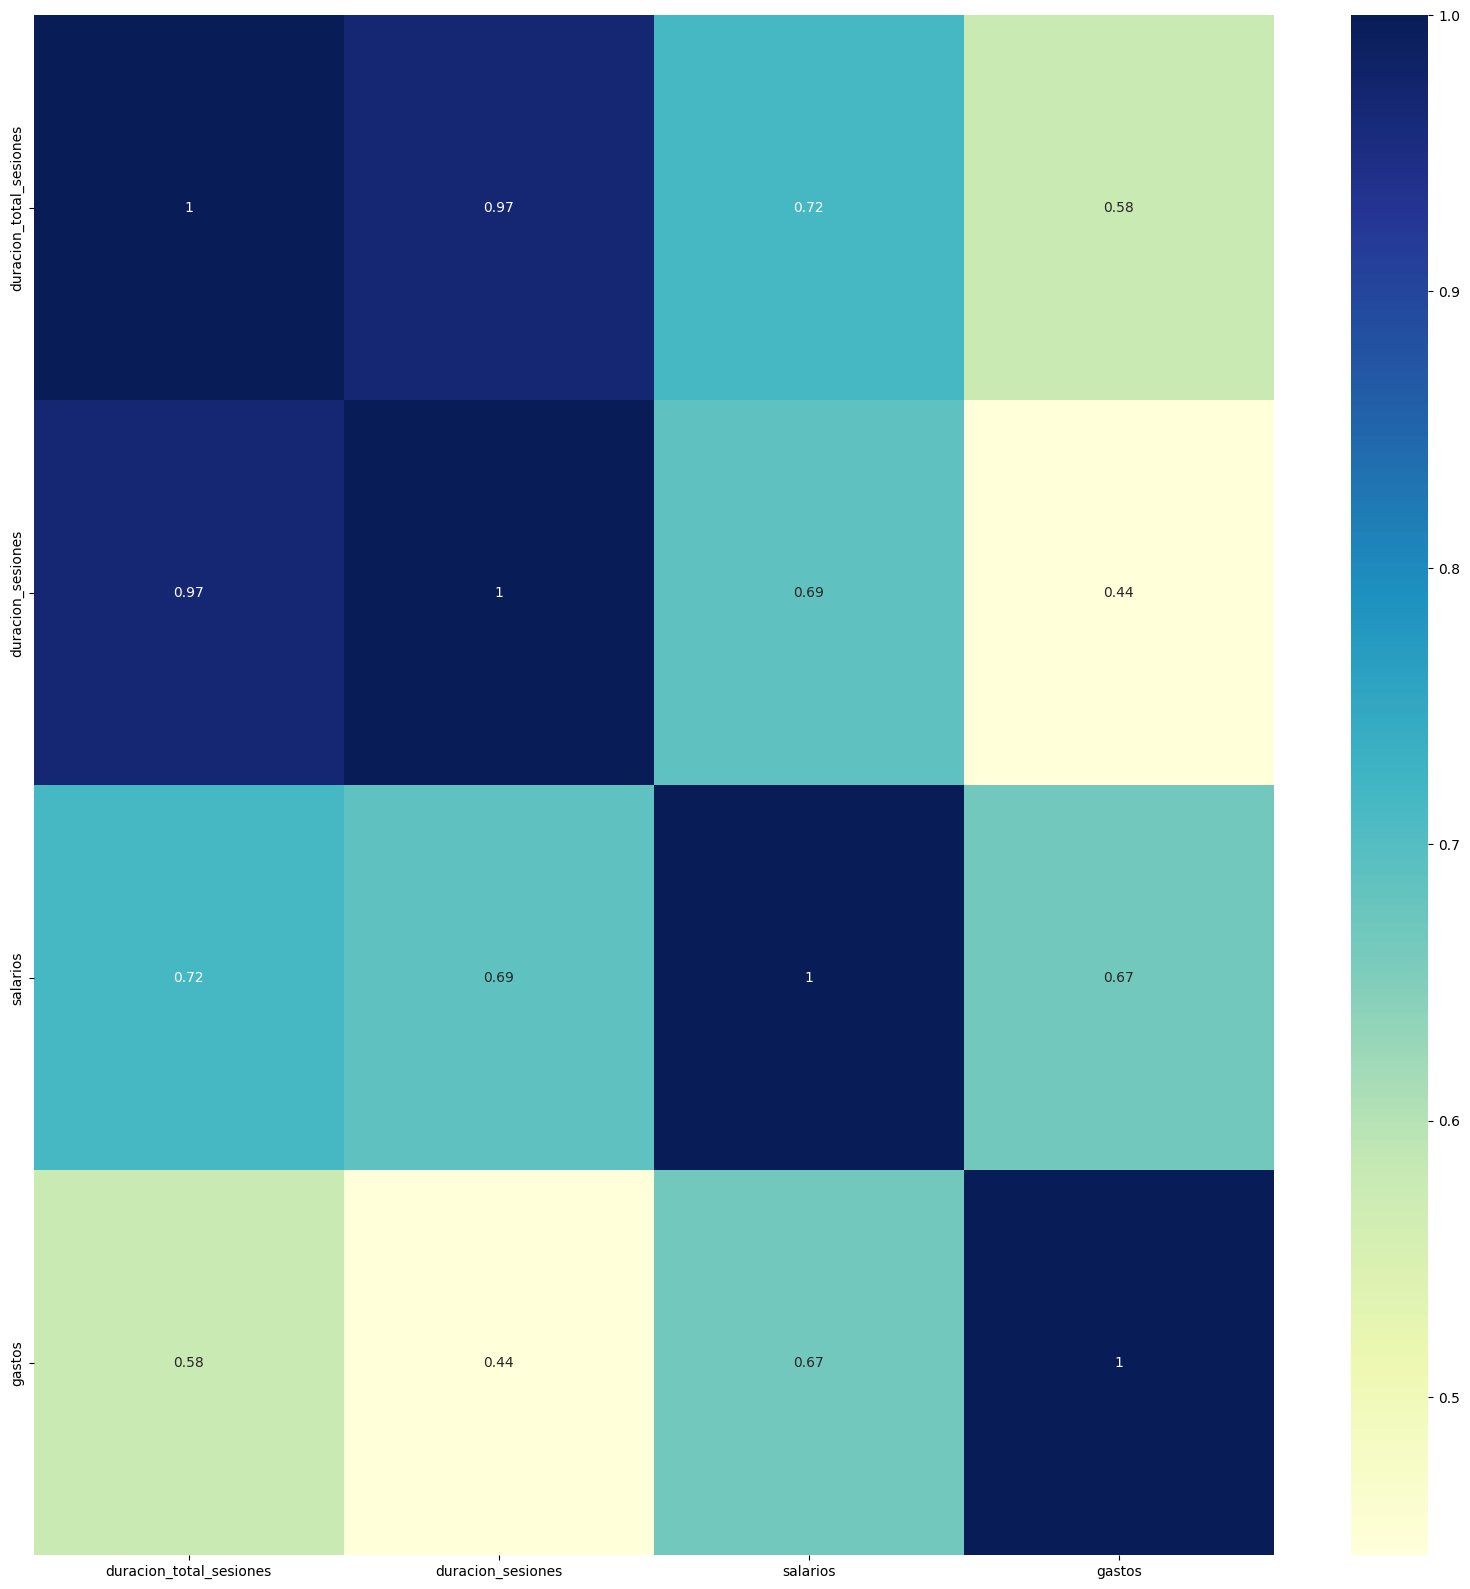

In [20]:
plt.figure(figsize=(20,20))
dataplot = sb.heatmap(states.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [21]:
states.sort_values(by=['duracion_total_sesiones'],ascending=False).head(10)

,duracion_total_sesiones,duracion_sesiones,salarios,gastos
state,,,,
New York,458.149994,427.149994,160.304016,2026.613831
California,390.000000,270.000000,213.405133,5521.194824
Arizona,286.129990,197.379997,48.393666,630.739258
Massachusetts,278.000000,278.000000,117.429547,477.220184
Ohio,258.000000,258.000000,122.161746,540.225769
Pennsylvania,242.000000,211.000000,157.913891,2433.338867
Michigan,213.000000,213.000000,160.606477,1141.694397
Colorado,205.199997,205.199997,60.492082,439.957687
North Carolina,181.760002,181.760002,28.130835,551.809753


In [22]:
states.sort_values(by=['duracion_sesiones'],ascending=False).head(10)

,duracion_total_sesiones,duracion_sesiones,salarios,gastos
state,,,,
New York,458.149994,427.149994,160.304016,2026.613831
Massachusetts,278.000000,278.000000,117.429547,477.220184
California,390.000000,270.000000,213.405133,5521.194824
Ohio,258.000000,258.000000,122.161746,540.225769
Michigan,213.000000,213.000000,160.606477,1141.694397
Pennsylvania,242.000000,211.000000,157.913891,2433.338867
Colorado,205.199997,205.199997,60.492082,439.957687
Arizona,286.129990,197.379997,48.393666,630.739258
North Carolina,181.760002,181.760002,28.130835,551.809753


In [23]:
states.sort_values(by=['salarios'],ascending=False).head()

,duracion_total_sesiones,duracion_sesiones,salarios,gastos
state,,,,
California,390.000000,270.000000,213.405133,5521.194824
Michigan,213.000000,213.000000,160.606477,1141.694397
New York,458.149994,427.149994,160.304016,2026.613831
Pennsylvania,242.000000,211.000000,157.913891,2433.338867
Illinois,169.000000,163.000000,136.784695,723.798859


In [24]:
states.sort_values(by=['gastos'],ascending=False).head()

,duracion_total_sesiones,duracion_sesiones,salarios,gastos
state,,,,
California,390.000000,270.000000,213.405133,5521.194824
Pennsylvania,242.000000,211.000000,157.913891,2433.338867
Florida,101.529995,90.169998,60.530594,2086.795532
New York,458.149994,427.149994,160.304016,2026.613831
Texas,100.820000,99.400002,14.518100,1551.813599


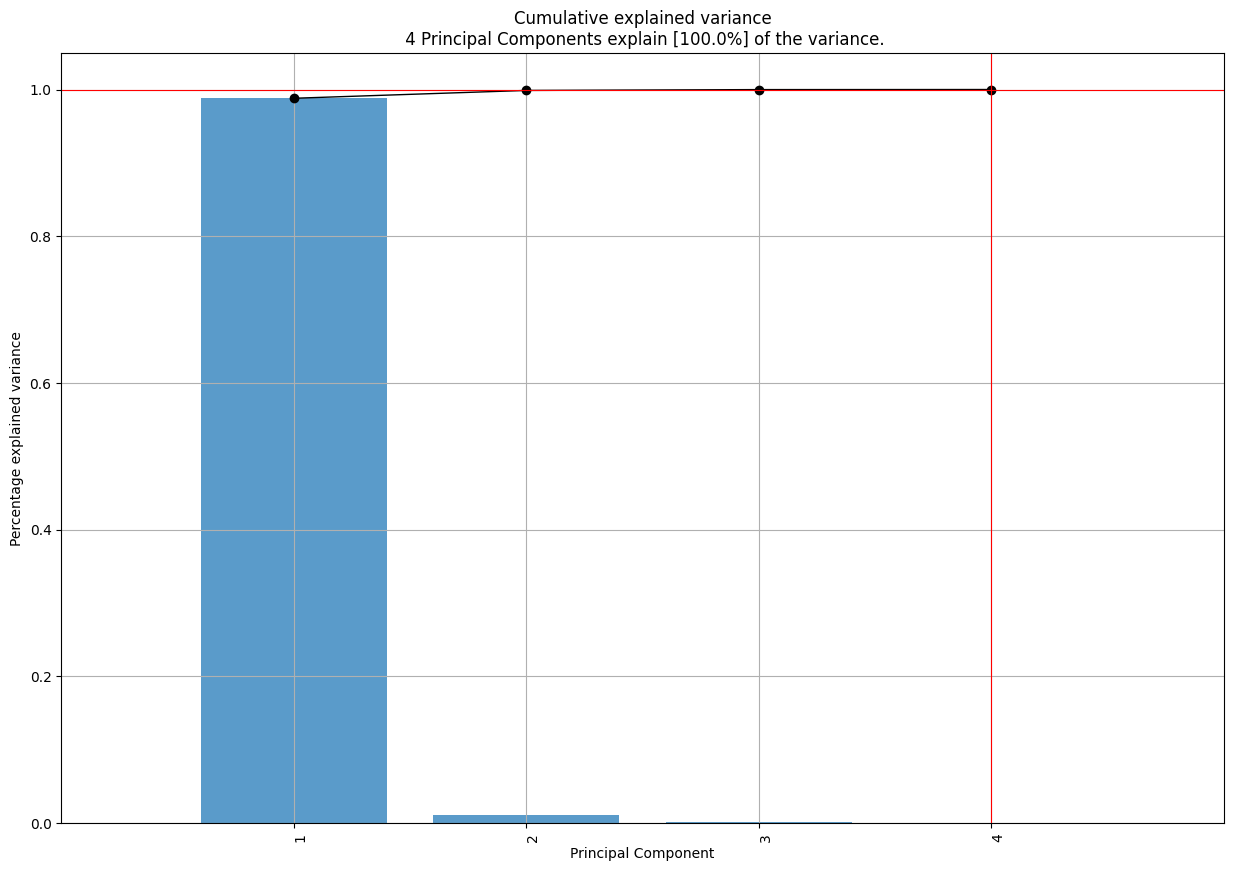

In [25]:
from pca import pca

model = pca(4,normalize=False,verbose=True)
results = model.fit_transform(states)

# Gráfica
fig, ax = model.plot()

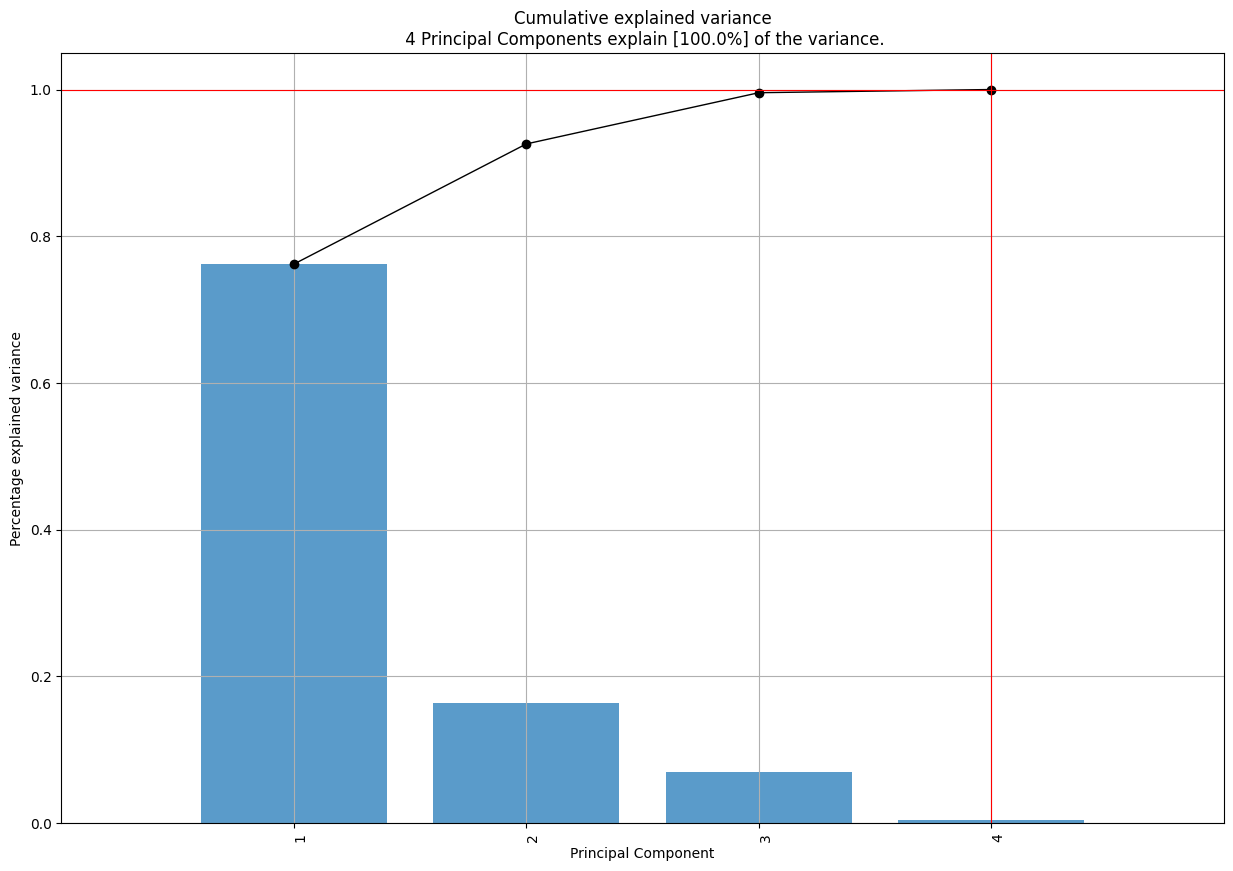

In [26]:
model = pca(4,normalize=True,verbose=True)
results = model.fit_transform(states)

# Gráfica
fig, ax = model.plot()

In [27]:
#puedo obtener la varianza explicada
results.get('explained_var')

array([0.76, 0.93, 1.  , 1.  ])

In [28]:
model = pca(2,normalize=True,verbose=True)
results = model.fit_transform(states)

#ver los pesos o loadings
loadings_pca=model.results['loadings'].transpose()
loadings_pca

,PC1,PC2
duracion_total_sesiones,0.542149,-0.332387
duracion_sesiones,0.518524,-0.506513
salarios,0.503353,0.231372
gastos,0.428769,0.761203


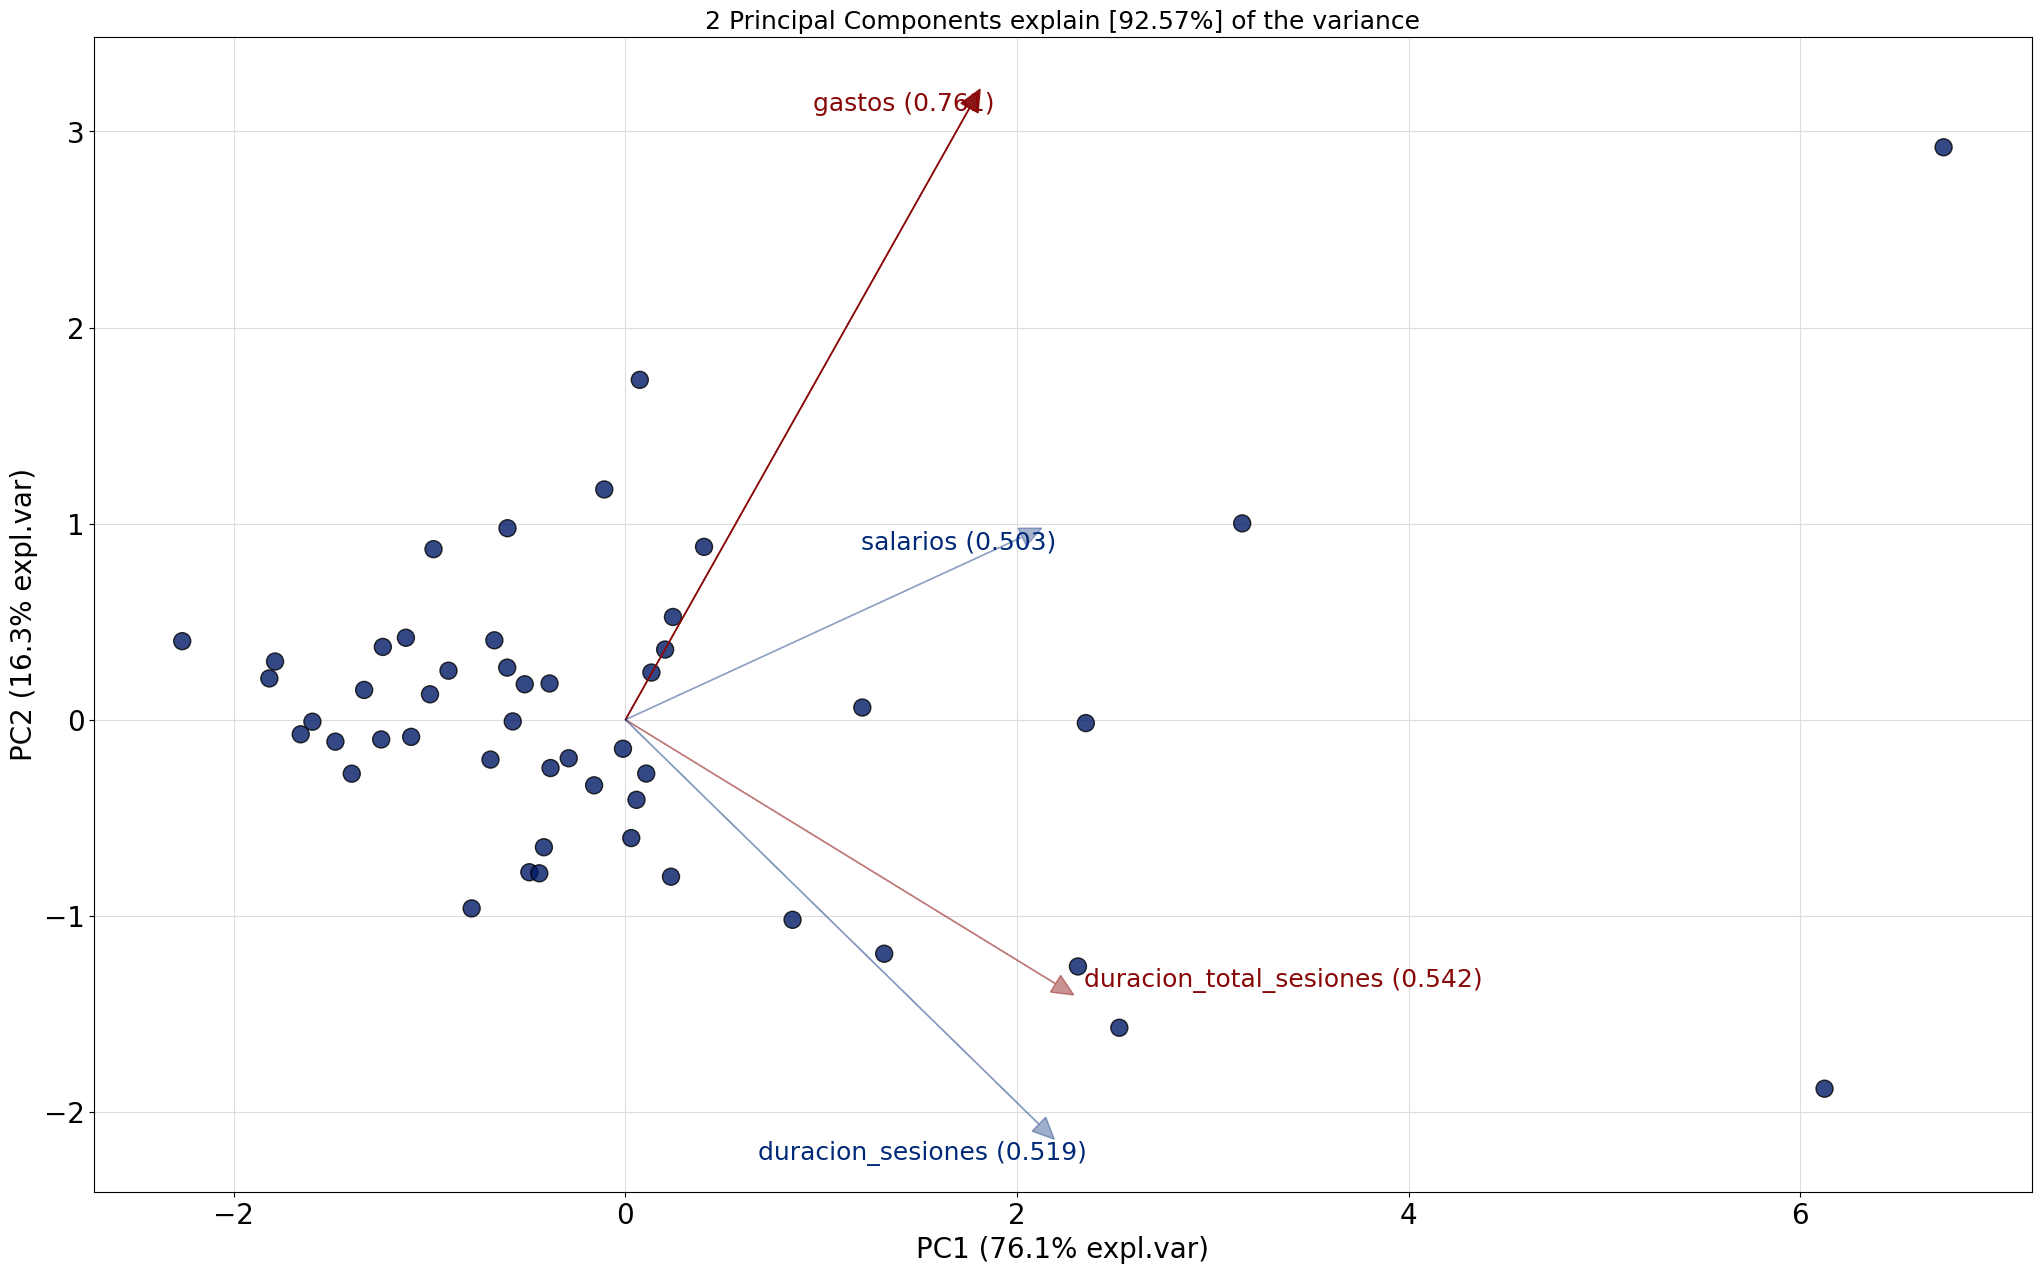

In [29]:
# Biplot
fig, ax = model.biplot(PC=[0, 1],legend=False)

In [30]:
scores=pd.DataFrame(scale(states).dot(loadings_pca))
scores["state"]=states.index
scores = scores.set_index("state")
scores.columns = ['PC1','PC2']
scores.head()

,PC1,PC2
state,,
Alabama,-1.094384,-0.087568
Alaska,0.401324,0.881470
Arizona,1.321492,-1.193515
Arkansas,-1.238863,0.371148
California,6.731493,2.919234


### Clustering: K-medias

In [31]:
from sklearn.cluster import KMeans


kmeans_c = KMeans(n_clusters = 5, random_state = 1234).fit(scores)
states['cluster'] = kmeans_c.labels_

states.groupby('cluster').mean()

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,duracion_total_sesiones,duracion_sesiones,salarios,gastos
cluster,,,,
0,84.984666,81.108666,18.513744,375.557864
1,235.904284,217.939999,114.826015,912.425003
2,390.000000,270.000000,213.405133,5521.194824
3,132.953199,128.213600,50.181879,675.132886
4,458.149994,427.149994,160.304016,2026.613831


<ipython-input-32-2e19b154a3e6>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=scores.PC1[i]+0.1,y=scores.PC2[i]+0.1,s=scores.index[i])


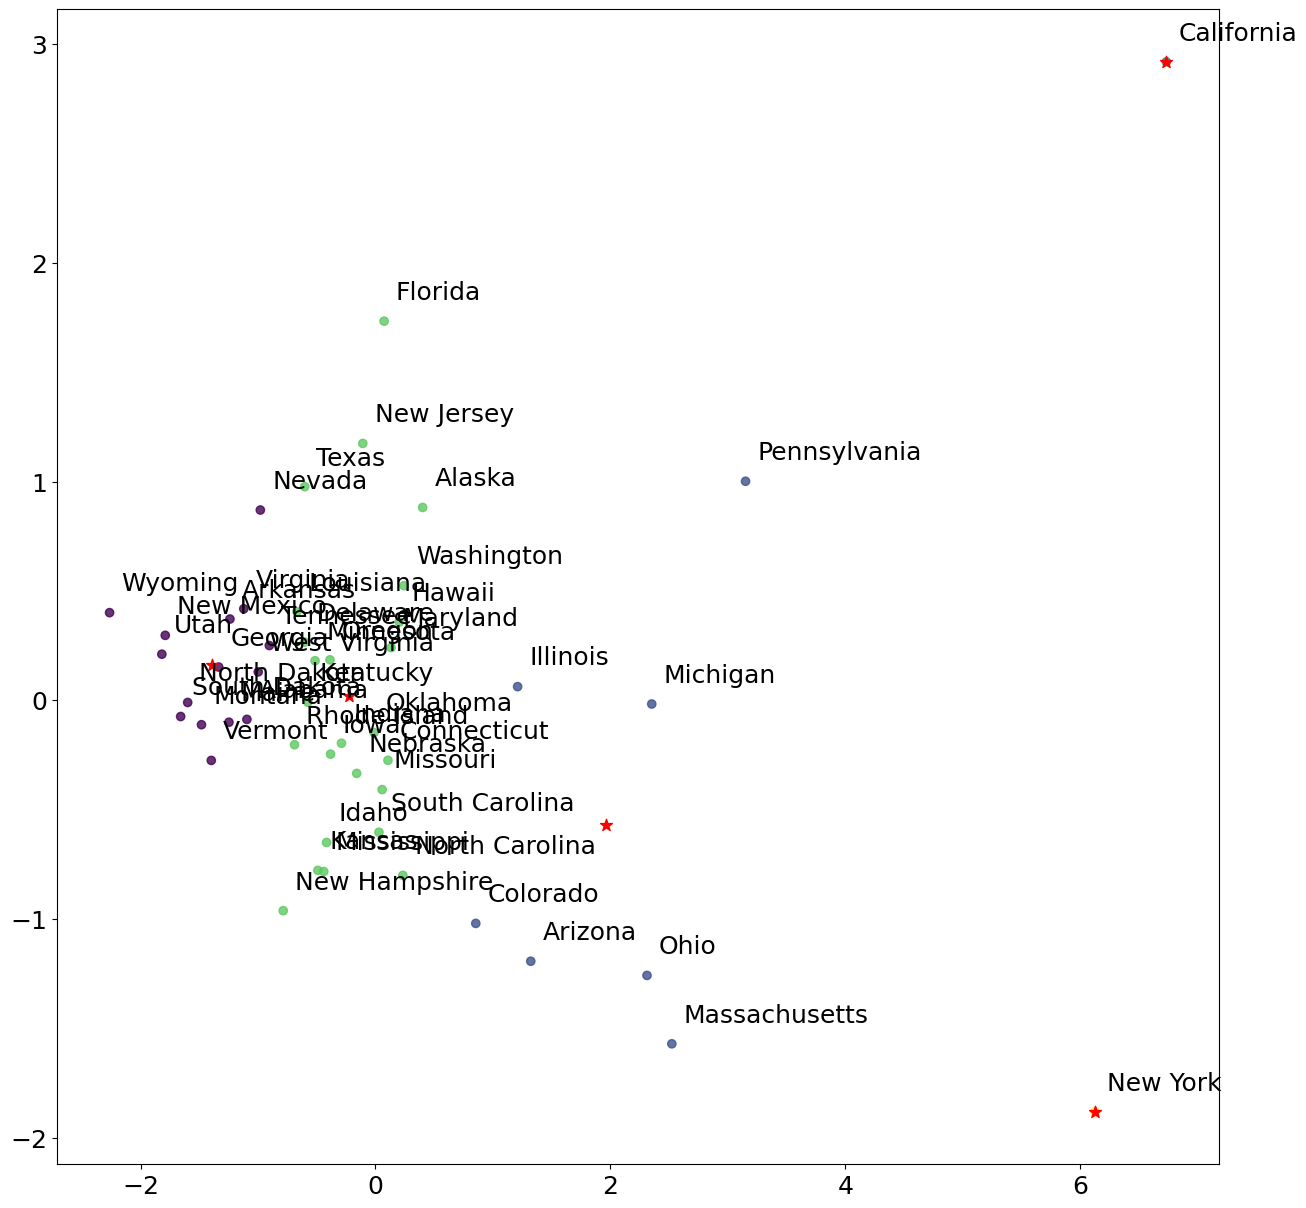

In [32]:
fig, ax = plt.subplots(figsize=(15,15))
g_puntos = plt.scatter(scores.iloc[:,0], scores.iloc[:,1], c = states['cluster'], alpha = 0.8, label = "Centroides")
plt.scatter(kmeans_c.cluster_centers_[:,0],kmeans_c.cluster_centers_[:,1],c=['r'],marker='*',s=80)
for i in range(scores.shape[0]):
    plt.text(x=scores.PC1[i]+0.1,y=scores.PC2[i]+0.1,s=scores.index[i])
plt.show()

In [33]:
from sklearn.metrics import silhouette_score

rg=5

varianza_intra_cluster = []
silhouettes = []

for k in range (1, rg): # Evaluamos entre 1 a rg clusters posibles
    kmeans = KMeans(n_clusters = k, random_state = 123).fit(scores)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(scores, kmeans.labels_)
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

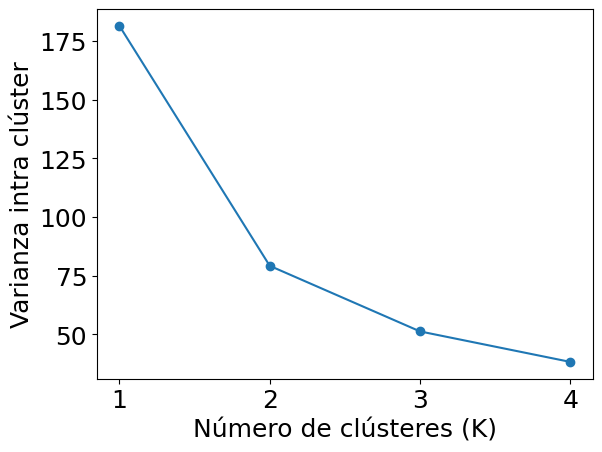

In [34]:
plt.plot(range(1, rg), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()

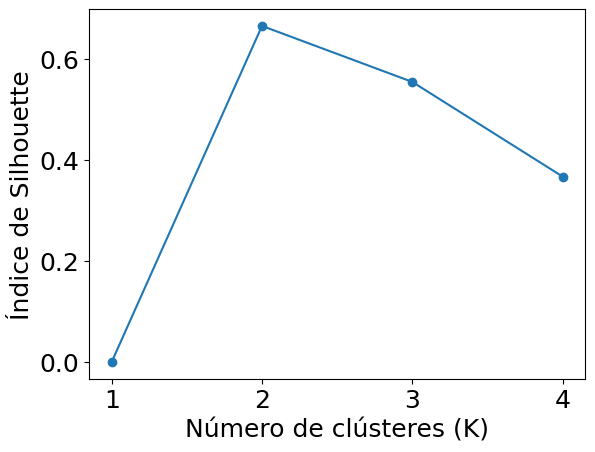

In [35]:
plt.plot(range(1, rg), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

In [36]:
kmeans = KMeans(n_clusters = 2, random_state = 1234).fit(scores)
states['cluster'] = kmeans.labels_
scores['cluster'] = kmeans.labels_
states.head()

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,duracion_total_sesiones,duracion_sesiones,salarios,gastos,cluster
state,,,,,
Alabama,116.550003,104.550003,1.470589,534.717224,0
Alaska,128.510002,127.800003,74.805863,1493.441223,0
Arizona,286.129990,197.379997,48.393666,630.739258,0
Arkansas,80.230000,80.230000,30.669025,516.390595,0
California,390.000000,270.000000,213.405133,5521.194824,1


In [37]:
scores.groupby('cluster').mean()

,PC1,PC2
cluster,,
0,-0.539279,0.018796
1,3.864832,-0.134705


In [38]:
states.groupby('cluster').mean()

,duracion_total_sesiones,duracion_sesiones,salarios,gastos
cluster,,,,
0,122.300697,115.989535,41.347060,565.260137
1,306.524999,276.191666,155.303468,2023.381312


<ipython-input-39-781e48a23ef8>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=scores.PC1[i]+0.1,y=scores.PC2[i]+0.1,s=scores.index[i])


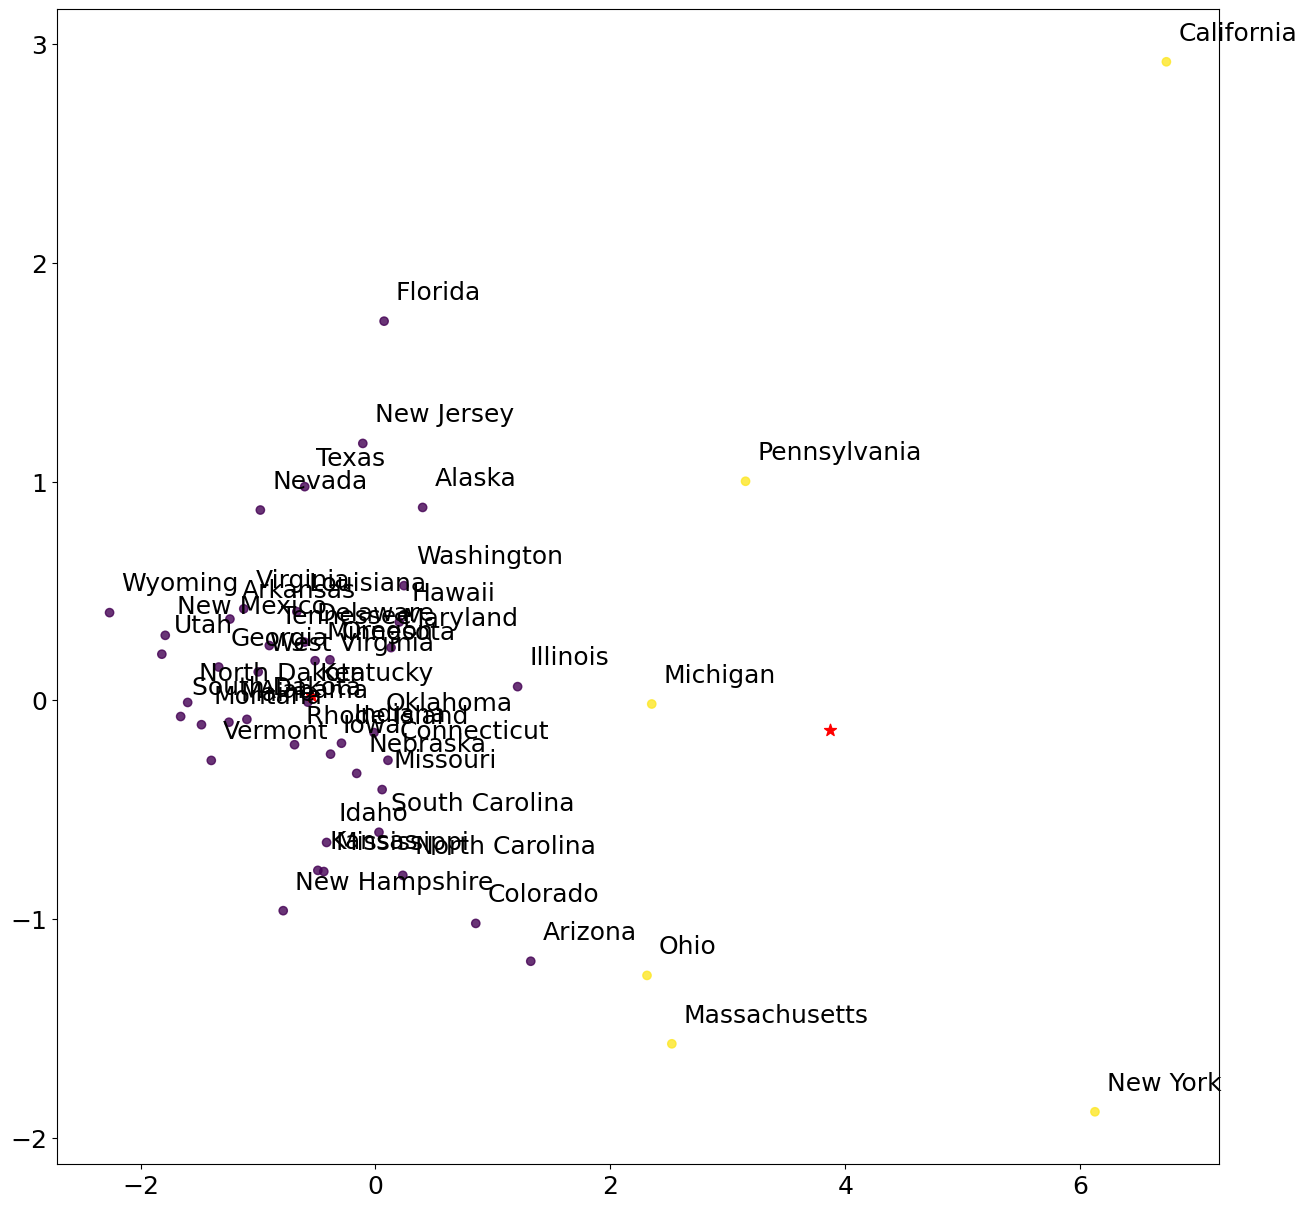

In [39]:
fig, ax = plt.subplots(figsize=(15,15))
g_puntos = plt.scatter(scores.iloc[:,0], scores.iloc[:,1], c = states['cluster'], alpha = 0.8, label = "Centroides")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c=['r'],marker='*',s=80)
for i in range(scores.shape[0]):
    plt.text(x=scores.PC1[i]+0.1,y=scores.PC2[i]+0.1,s=scores.index[i])
plt.show()

### 4. K-medoides


In [40]:
from sklearn_extra.cluster import KMedoids


Kmedoides_scores = KMedoids(n_clusters = 3, random_state = 321).fit(scores)
states['cluster_medoids'] = Kmedoides_scores.labels_
scores['cluster_medoids'] = Kmedoides_scores.labels_

In [41]:
states.groupby('cluster_medoids').mean()

,duracion_total_sesiones,duracion_sesiones,salarios,gastos,cluster
cluster_medoids,,,,,
0,81.229091,79.234546,14.063116,260.729080,0.00000
1,108.291999,101.444666,49.856315,895.317396,0.00000
2,199.138260,184.845652,78.574148,876.030129,0.26087


<ipython-input-42-b7a6e043a0b9>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=scores.PC1[i]+0.3,y=scores.PC2[i]+0.3,s=scores.index[i])


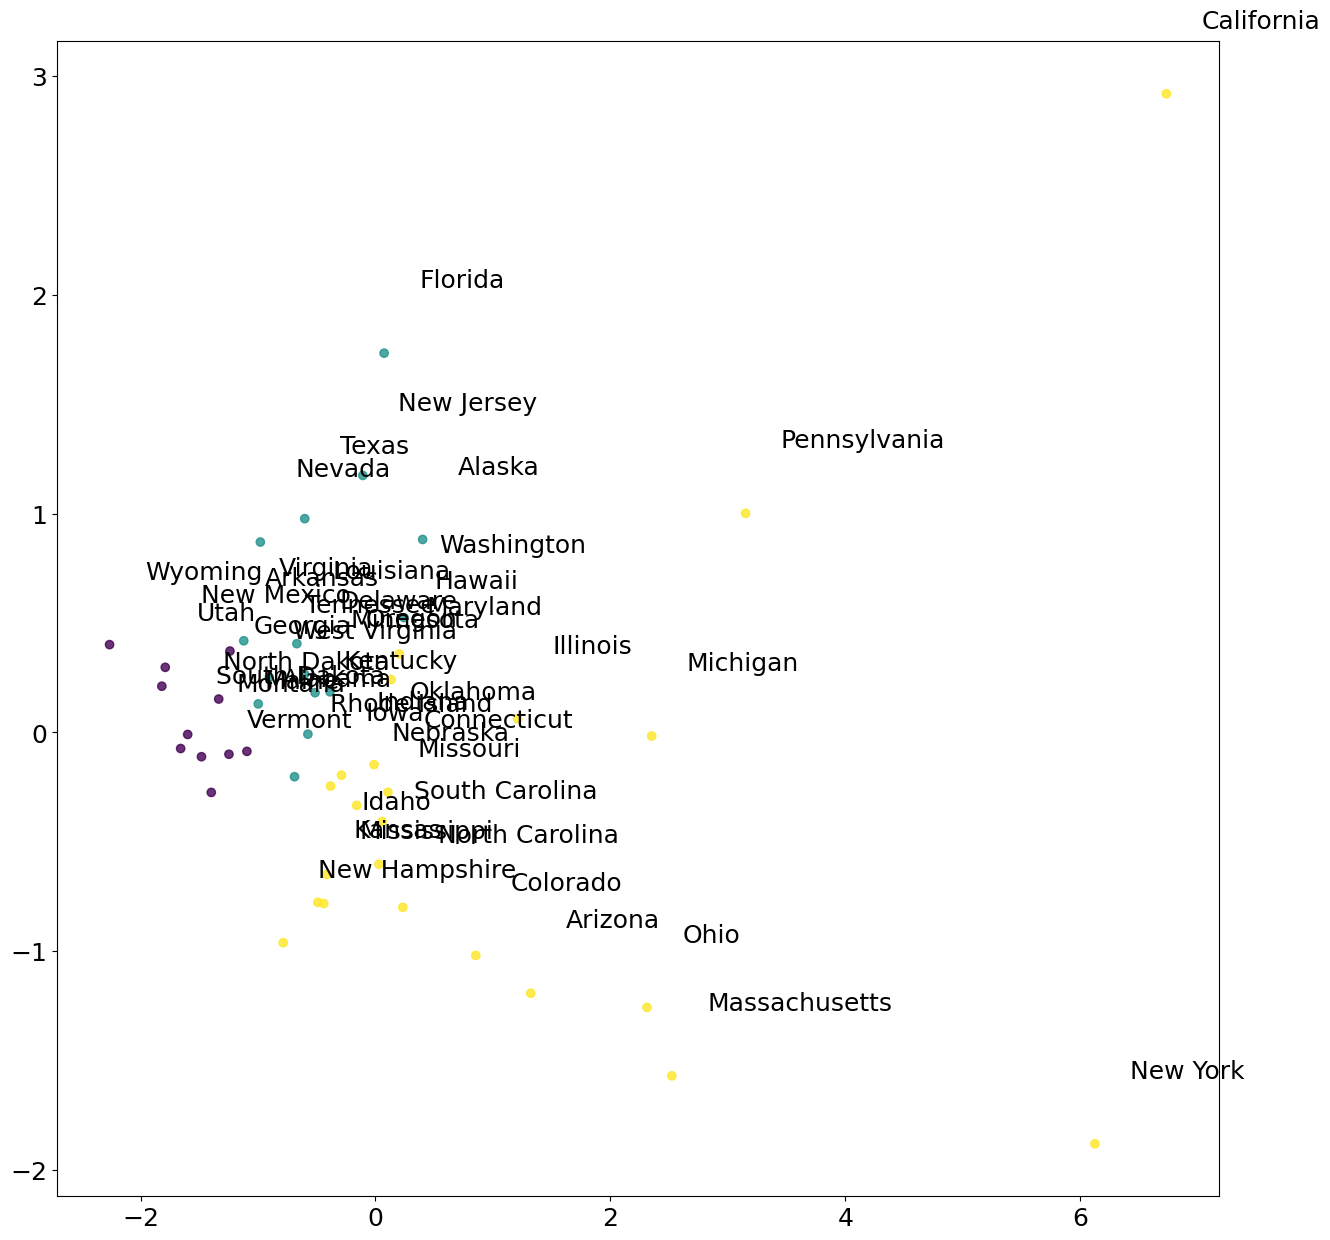

In [42]:
fig, ax = plt.subplots(figsize=(15,15))
g_puntos = plt.scatter(scores.iloc[:,0], scores.iloc[:,1], c = states['cluster_medoids'], alpha = 0.8, label = "Centroides")
for i in range(scores.shape[0]):
    plt.text(x=scores.PC1[i]+0.3,y=scores.PC2[i]+0.3,s=scores.index[i])
plt.show()

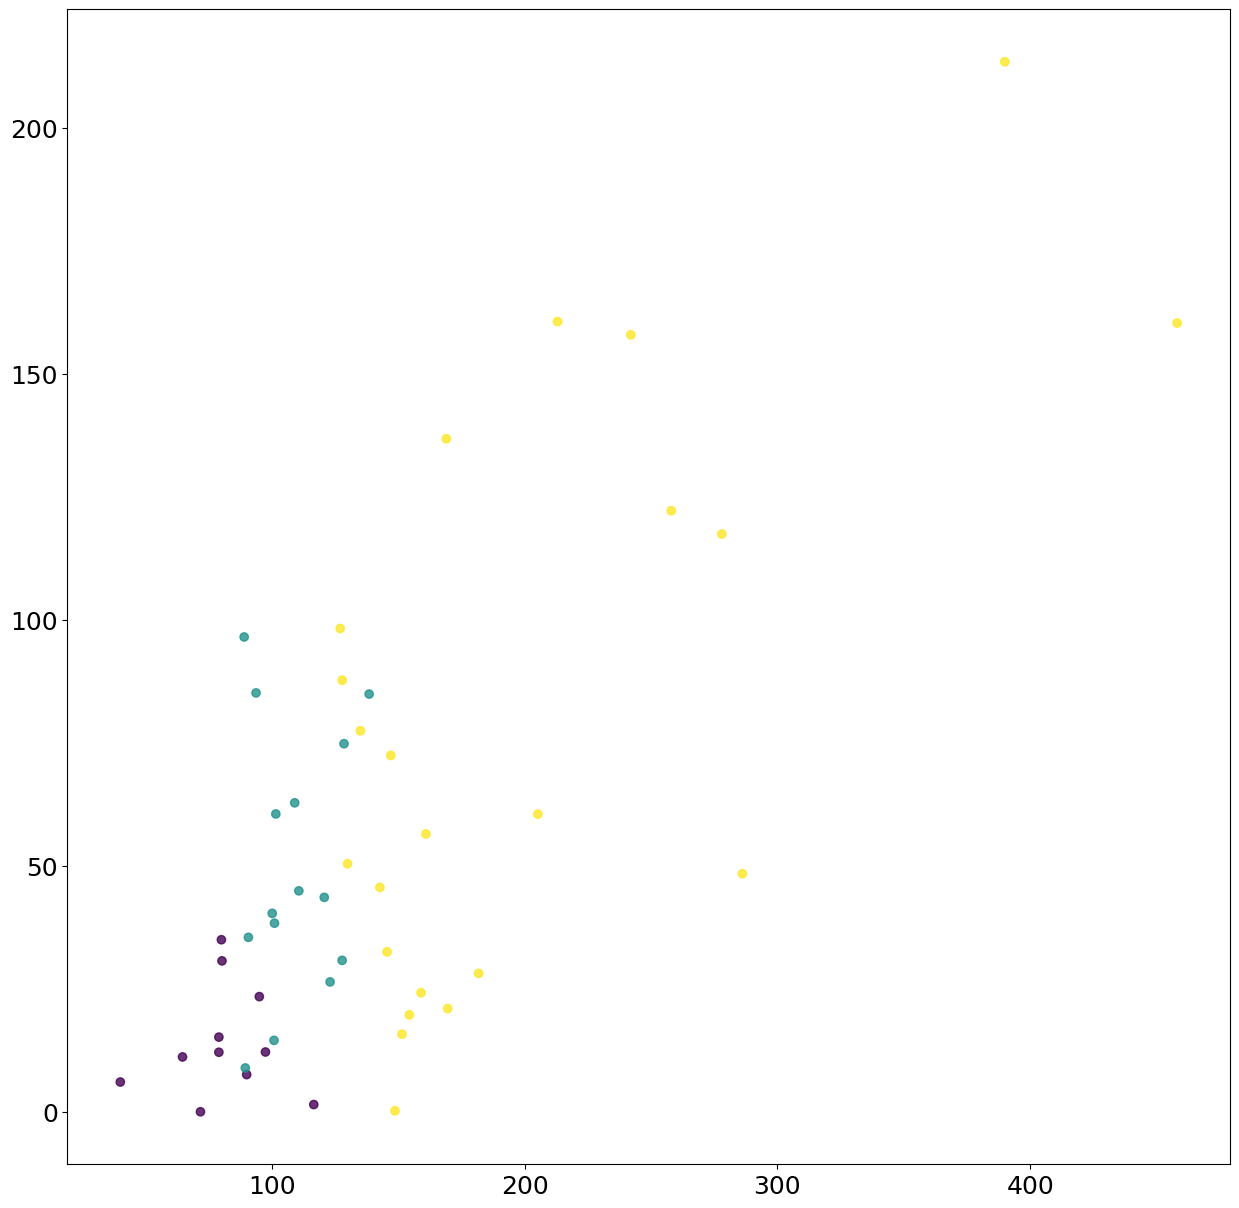

In [43]:
fig, ax = plt.subplots(figsize=(15,15))
g_puntos = plt.scatter(states.iloc[:,0], states.iloc[:,2], c = states['cluster_medoids'], alpha = 0.8, label = "Centroides")
#for i in range(states.shape[0]):
    #plt.text(x=states.iloc[i,0]+0.3,y=states.iloc[i,1]+0.3,s=states.index[i])
plt.show()

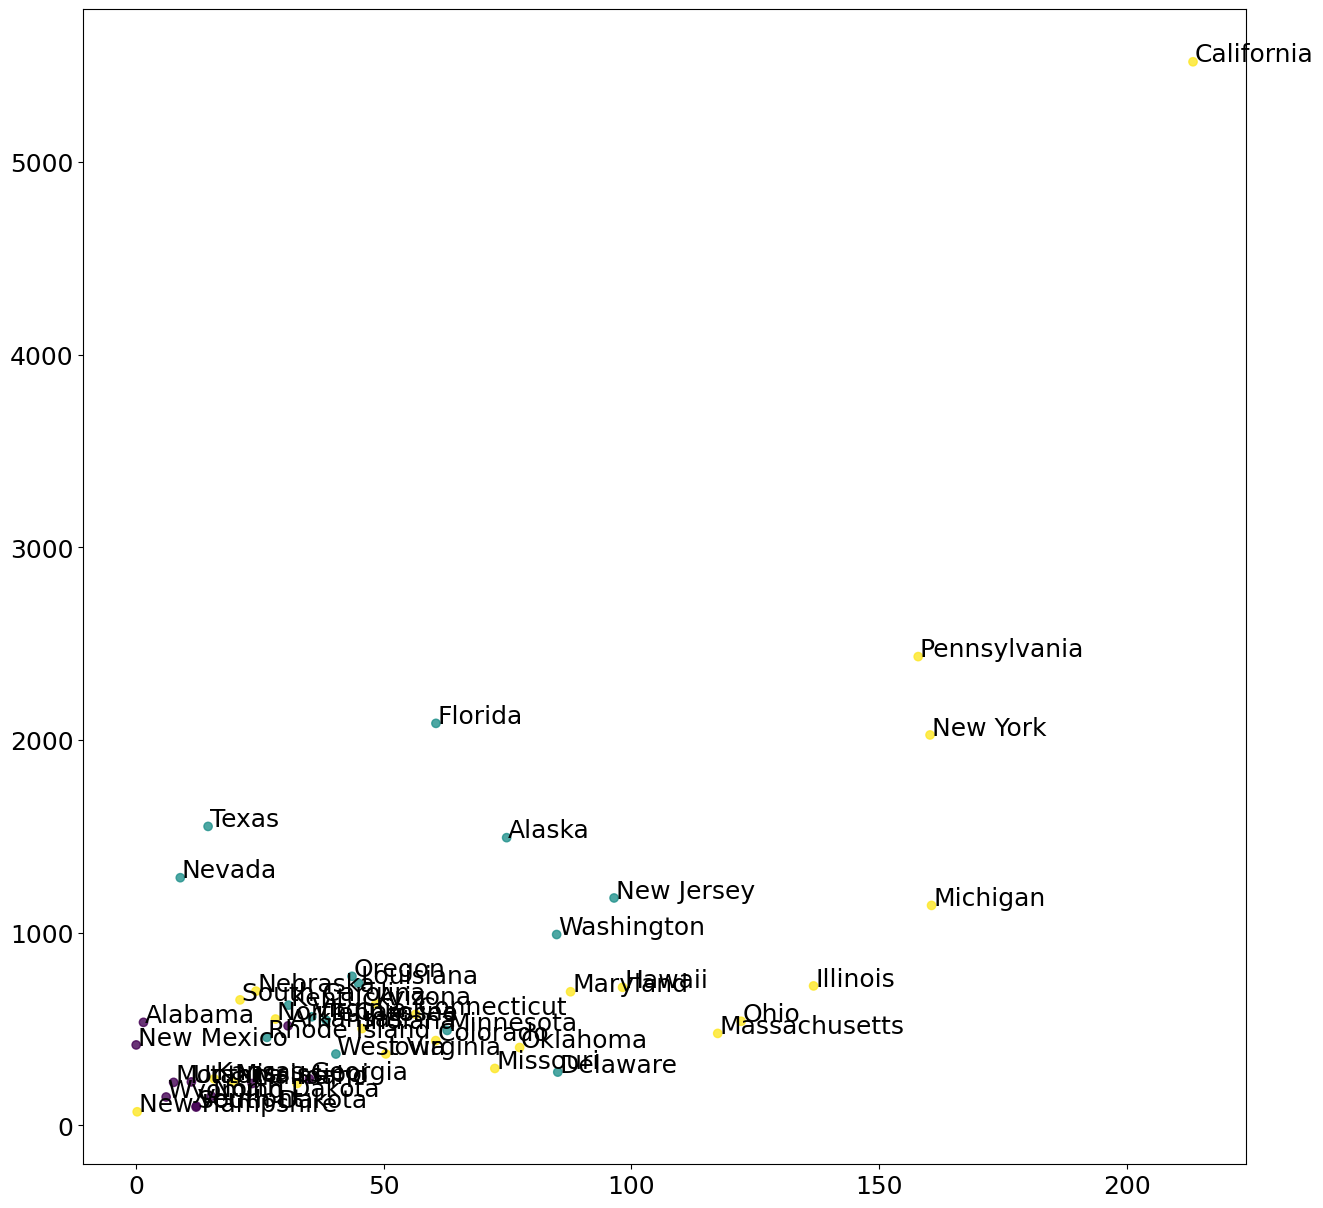

In [44]:
fig, ax = plt.subplots(figsize=(15,15))
g_puntos = plt.scatter(states.iloc[:,2], states.iloc[:,3], c = states['cluster_medoids'], alpha = 0.8, label = "Centroides")
for i in range(states.shape[0]):
    plt.text(x=states.iloc[i,2]+0.3,y=states.iloc[i,3]+0.3,s=states.index[i])
plt.show()

In [45]:
Kmedoides_scaled = KMedoids(n_clusters = 2, random_state = 321).fit(scale(states))


In [46]:
states['cluster_medoids_scaled'] = Kmedoides_scaled.labels_
scores['cluster_medoids_scaled'] = Kmedoides_scaled.labels_

<ipython-input-47-f9a24b4ee06f>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x=scores.PC1[i]+0.1,y=scores.PC2[i]+0.1,s=scores.index[i])


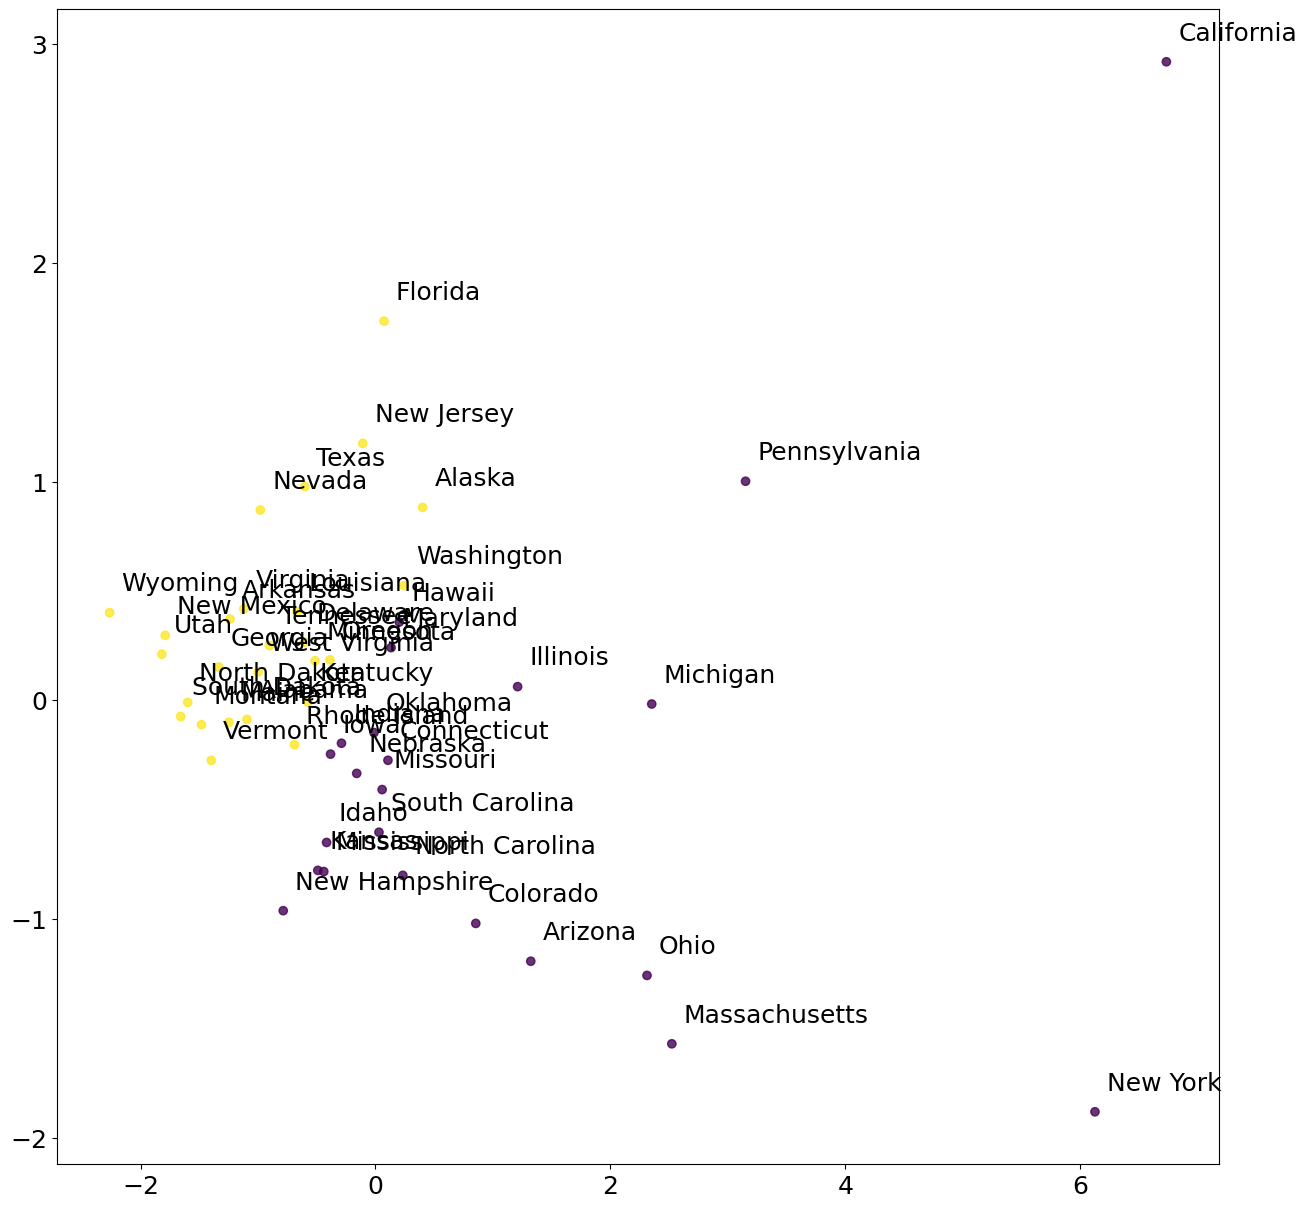

In [47]:
fig, ax = plt.subplots(figsize=(15,15))
g_puntos = plt.scatter(scores.iloc[:,0], scores.iloc[:,1], c = states['cluster_medoids_scaled'], alpha = 0.8, label = "Centroides")
for i in range(scores.shape[0]):
    plt.text(x=scores.PC1[i]+0.1,y=scores.PC2[i]+0.1,s=scores.index[i])
plt.show()

# Referencias

- Leskovec, J., Rajaraman, A., & Ullman, J. D. (2020). Mining of massive data sets. Cambridge university press.
- Waggoner, P. Unsupervised Machine Learning for Clustering in Political and Social Research. Mimeo